In [20]:
import numpy as np
import pandas as pd
import csv
import glob
import igl
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import mpl_toolkits.mplot3d 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
import os

In [21]:
current_dir = os.getcwd()
path = os.path.join(current_dir, "Whale", "blue-ref.csv")

with open(path, 'r') as file:
    csvreader = csv.reader(file)
    data = []
    for row in csvreader:
        data.append(row)
    data = np.array(data)


In [22]:
#Source: https://www.geeksforgeeks.org/how-to-read-all-csv-files-in-a-folder-in-pandas/
# use glob to get all the csv files 
# in the folder
current_dir  = os.getcwd()
csv_files = glob.glob(os.path.join(current_dir, "Whale", "*.csv"))
  
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
    
    df = np.array(df)


In [23]:
print(data.shape)
print(data[0])

(14, 73)
['tag-id' 'animal-id' 'animal-taxon' 'deploy-on-date' 'deploy-off-date'
 'animal-birth-hatch-latitude' 'animal-birth-hatch-longitude'
 'animal-comments' 'animal-death-comments' 'animal-exact-date-of-birth'
 'animal-group-id' 'animal-latest-date-born' 'animal-life-stage'
 'animal-marker-id' 'animal-mass' 'animal-mates'
 'animal-mortality-latitude' 'animal-mortality-longitude'
 'animal-mortality-type' 'animal-nickname' 'animal-offspring'
 'animal-parents' 'animal-reproductive-condition' 'animal-ring-id'
 'animal-sex' 'animal-siblings' 'animal-taxon-detail' 'attachment-type'
 'behavior-according-to' 'capture-handling-time' 'capture-latitude'
 'capture-longitude' 'capture-timestamp' 'data-processing-software'
 'dba-comments' 'deploy-off-latitude' 'deploy-off-longitude'
 'deploy-off-measurements' 'deploy-off-person' 'deploy-off-sampling'
 'deploy-on-latitude' 'deploy-on-longitude' 'deploy-on-measurements'
 'deploy-on-person' 'deploy-on-sampling' 'deployment-comments'
 'deployment-e

['-119.0048' '-119.0481' '-119.0433' '-119.0427' '-119.0008' '-118.9806'
 '-118.9799' '-119.1408' '-120.61992' '-120.62099' '-120.61913'
 '-120.59911' '-120.61107']
['33.9758' '34.0094' '34.001' '33.9876' '33.9825' '33.9841' '33.9687'
 '34.04875' '34.1113' '34.11111' '34.10566' '34.08503' '34.12554']


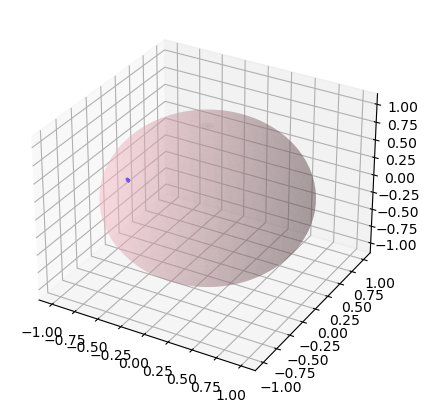

In [24]:
long = data[1:,41]
lat = data[1:,40]

print(long)
print(lat)
#filter empty string in long and lat
long = long[long != '']
lat = lat[lat != '']

# convert to polar coordinates
lat = lat.astype(float)
long = long.astype(float)

# convert to radians
long = np.deg2rad(long)
lat = np.deg2rad(lat)


# convert to cartesian coordinates
x = np.cos(lat) * np.cos(long)
y = np.cos(lat) * np.sin(long)
z = np.sin(lat)

# Create a sphere
r = 1
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
xs = r*np.cos(u)*np.sin(v)
ys = r*np.sin(u)*np.sin(v)
zs = r*np.cos(v)

# plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xs, ys, zs, color='pink', alpha=0.3, label='Sphere')
# ax.set_xlim3d(-1, 1)
# ax.set_ylim3d(-1, 1)
# ax.set_zlim3d(-1, 1)
ax.scatter(x, y, z, s=2, color='b', label='Data')
plt.show()